<h1><center>Parameter Tuning and Cross-Validation </center></h1>

This practical work aims to implement a popular machine learning method that is the LASSO and its parameter tuning. We recall that the LASSO solution minimizes the objective function
$$
\frac{1}{2n}\|Y - X \beta\|^2 + \lambda |\beta|_1,
$$
where $\lambda$ is a tuning parameter.


In [35]:
import numpy as np
from matplotlib import pyplot as plt

1. Generate a sample according to the linear model $Y = X \beta + \sigma \xi$ where $\xi$ is a standard normal vector and $X$ the design matrix has i.i.d. standard normal entries and $\beta$ is $s-$sparse.

In [36]:
p = 10000
s = 100
n = 1000
sigma = 10.
X = np.random.randn(n, p)
beta = np.ones(p)
beta[s:] = 0
y = np.dot(X,beta) + np.random.randn(n) * sigma  

2. Using scikit_learn, compute the LASSO coefficient corresponding to $\alpha = 1.6$. What do you observe about the estimated parameter?

In [37]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=1.6)
clf.fit(X, y)
print(np.sum(clf.coef_ != 0))
clf.coef_.size

15


10000

In [38]:
print(np.sum(clf.coef_[:s] != 0))
clf.coef_.size

10


10000

3. Using cross_val_score, what is the CV mean squared error of the previous estimator?

In [39]:
from sklearn.model_selection import cross_val_score
-cross_val_score(clf, X, y, cv=5, scoring="neg_mean_squared_error").mean()

198.8925342943441

4. Use the previous questions to find the best tuning parameter $\lambda$. You can also plot the curve of MSE as a function of $\lambda$.

In [41]:
line = np.linspace(0.02,2.2,100)
scores = []
for lamda in line: 
    clf = linear_model.Lasso(alpha=lamda)
    score = -cross_val_score(clf, X, y, cv=5, scoring='neg_mean_squared_error', n_jobs=-1).mean()
    scores.append(score)

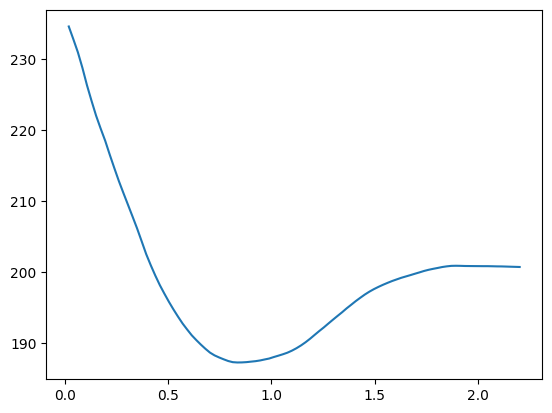

In [42]:
plt.plot(line,scores)

5. Compare your results to the CV version of LASSO in scikit_learn.


In [46]:
np.argmin(scores)

37

In [43]:
from sklearn.linear_model import LassoCV

In [51]:
reg = LassoCV(cv=5, random_state=None)
reg.fit(X,y)

,eps,0.001
,n_alphas,'deprecated'
,alphas,'warn'
,fit_intercept,True
,precompute,'auto'
,max_iter,1000
,tol,0.0001
,copy_X,True
,cv,5
,verbose,False
,n_jobs,None


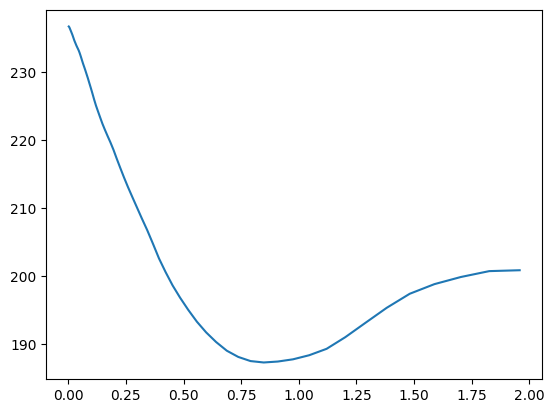

In [53]:
plt.plot(reg.alphas_,reg.mse_path_.mean(axis=1))
reg.alphas_;

In [57]:
np.argmin(reg.mse_path_.mean(axis=1))

12

In [54]:
reg.alphas_

array([1.95901454, 1.82698352, 1.70385094, 1.58901709, 1.48192266,
       1.38204603, 1.28890076, 1.20203316, 1.12102015, 1.04546714,
       0.97500615, 0.909294  , 0.84801063, 0.79085755, 0.7375564 ,
       0.68784757, 0.64148894, 0.59825474, 0.55793437, 0.52033146,
       0.48526286, 0.45255777, 0.42205689, 0.39361167, 0.36708356,
       0.34234335, 0.31927056, 0.29775279, 0.27768525, 0.25897019,
       0.24151647, 0.22523907, 0.21005871, 0.19590145, 0.18269835,
       0.17038509, 0.15890171, 0.14819227, 0.1382046 , 0.12889008,
       0.12020332, 0.11210201, 0.10454671, 0.09750062, 0.0909294 ,
       0.08480106, 0.07908576, 0.07375564, 0.06878476, 0.06414889,
       0.05982547, 0.05579344, 0.05203315, 0.04852629, 0.04525578,
       0.04220569, 0.03936117, 0.03670836, 0.03423434, 0.03192706,
       0.02977528, 0.02776852, 0.02589702, 0.02415165, 0.02252391,
       0.02100587, 0.01959015, 0.01826984, 0.01703851, 0.01589017,
       0.01481923, 0.01382046, 0.01288901, 0.01202033, 0.01121

In [56]:
np.sum(reg.coef_[:s] != 0)

45